In [7]:
import os
import glob

import pandas as pd
import numpy as np

In [8]:
from helpers import *

### Per kön

In [42]:
concept = 'mean_income_aged_gt_20'

In [43]:
medelkon = glob.glob('../indata/supermappen/*MedelkonBas*.csv')

In [44]:
def readMedelkonBas(file):
    df = pd.read_csv(file, encoding='latin1' , sep=';', decimal=',', header=1)
    df['year'] = pd.to_datetime(getYear(file))
    df = df.rename(columns={
        "M=1 Kv = 2":'Kön',
        'Basområde': 'BASKOD2010',
        'inkl 0': 'value'
    })
    df['Kön'] = df['Kön'].astype('category')
    df['Kön'].cat.categories = ['male', 'female']
    df['year'] = df['year'].apply(lambda t: t.year)
    return df

In [45]:
df = pd.concat(list(map(readMedelkonBas, medelkon)))

In [46]:
df = baskod2010tobasomrade(df)

In [47]:
df = df[['basomrade', 'year', 'value','Kön']]

In [49]:
female, male = byGender(concept, df)

Saved mean_income_aged_gt_20_male to ../ddf--sodertornsmodellen-output/ddf--sodertornsmodellen--src/ddf--datapoints--mean_income_aged_gt_20_male--by--basomrade--year.csv

Saved mean_income_aged_gt_20_female to ../ddf--sodertornsmodellen-output/ddf--sodertornsmodellen--src/ddf--datapoints--mean_income_aged_gt_20_female--by--basomrade--year.csv



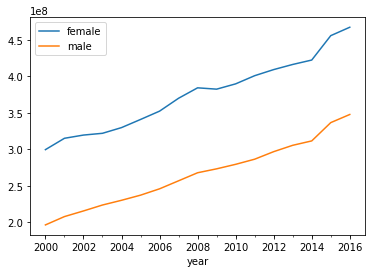

In [50]:
plotcombined(female, 'female')
plotcombined(male, 'male')

### Total

In [30]:
medel = glob.glob('../indata/supermappen/*MedelBas*.csv')

In [31]:
concept = 'mean_income_aged_gt_20'

In [32]:
def readMedel(file):
    df = pd.read_csv(file, encoding='latin1' , sep=';', decimal=',')
    df['year'] = pd.to_datetime(getYear(file))
    df = df.rename(columns={
        'basomrade': 'BASKOD2010',
        'Medel': 'value'
    })
    df['year'] = df['year'].apply(lambda t: t.year)
    return df

In [33]:
df = pd.concat(list(map(readMedel, medel)))

In [34]:
df = baskod2010tobasomrade(df)

In [39]:
df = df[['basomrade', 'year', 'value']]

Saved mean_income_aged_gt_20 to ../ddf--sodertornsmodellen-output/ddf--sodertornsmodellen--src/ddf--datapoints--mean_income_aged_gt_20--by--basomrade--year.csv



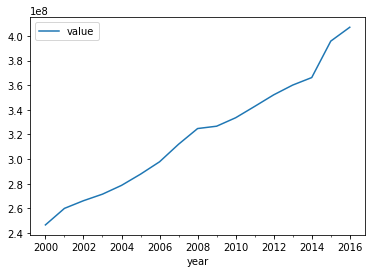

In [41]:
combined = appendNewDatapoints(concept, df)
plotcombined(combined)